# Comparing sentiment analysers

In this example e will compare different sentiment analysers on the same set of sentiences including an **ambigous** (sarcastic) sentence to show how these sentiment analiser can produce varying results. 

The streamlined script utilises a custom `sentiment_toolkit.py` module and includes the following analysers, ordered from **simplest (lexicon-based)** to **more advanced (transformers)**:

1. **NLTK VADER**: A rule-based sentiment analyzer that's specifically attuned to social media text and handles negations.
2. **TextBlob**: A simple API that provides polarity (positive/negative) and subjectivity scores.
3. **spaCy with spacytextblob**: An extension that brings TextBlob's functionality into spaCy's pipeline.
4. **Flair**: A powerful NLP library with state-of-the-art sentiment models.
5. **BERT**: A transformer-based model that provides more contextual understanding of the text.
6. **DistilBERT**: ???
7. **RoBERTa**: Another transformer model with different architecture than BERT.

We will summarise and conpare the results using visualisations.



## 0. Set-up (install & downloads)

```python
# The following modules should already be installed if you are using Binder cloud environment.
# If you are running other environments, please uncomment the next lines and run only once:
```

In [ ]:
#!pip install --upgrade spacy
#!pip install --upgrade spacytextblob

# Download small spaCy model
!python -m spacy download en_core_web_sm


You can always check if these packages are installed and their versions:

In [12]:
!python -m pip show spacy spacytextblob

Name: spacy
Version: 3.8.7
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: C:\Users\Vitali\anaconda3\Lib\site-packages
Requires: catalogue, cymem, jinja2, langcodes, murmurhash, numpy, packaging, preshed, pydantic, requests, setuptools, spacy-legacy, spacy-loggers, srsly, thinc, tqdm, typer, wasabi, weasel
Required-by: spacytextblob
---
Name: spacytextblob
Version: 5.0.0
Summary: A TextBlob sentiment analysis pipeline component for spaCy.
Home-page: https://spacytextblob.netlify.app/
Author: 
Author-email: 
License: 
Location: C:\Users\Vitali\anaconda3\Lib\site-packages
Requires: spacy, textblob
Required-by: 


## 1. Imports & Configuration

In [4]:
from spacytextblob.spacytextblob import SpacyTextBlob

# Load a custom designed module
from sentiment_toolkit import SentimentAnalyser, consolidate, harmonise_5, plots

## 2: Define a Small Corpus

**Tip:** You can alwasy expand on this. For example, reading text data from PDF, using sentence tokenizer, and storring all the sentences in a list called `text`.

In [5]:
texts = [
    "The service was fast, but the staff didn't seem to care.",
    "Fantastic update — it broke everything again.",
    "The product quality is excellent and the support is outstanding.",
    "This was a terrible experience and a complete waste of money.",
    "The company overstated its sustainability profile in sleek filings, hiding weak environmental performance.",
]

## 3. Perfrom Sentiment Analysis

In [6]:
# Initialize SentimentAnalyser object:
sa = SentimentAnalyser()

In [7]:
# Try VADER sentiment analyser on your dataset:
sa.analyse_vader(texts)

,analyser,text,compound,neg,neu,pos,interpretation
0,NLTK VADER,"The service was fast, but the staff didn't see...",-0.5334,0.256,0.744,0.000,negative
1,NLTK VADER,Fantastic update — it broke everything again.,0.2023,0.269,0.385,0.346,positive
2,NLTK VADER,The product quality is excellent and the suppo...,0.8860,0.000,0.402,0.598,very positive
3,NLTK VADER,This was a terrible experience and a complete ...,-0.7096,0.457,0.543,0.000,very negative
4,NLTK VADER,The company overstated its sustainability prof...,-0.6249,0.317,0.683,0.000,very negative


In [8]:
# Try another sentiment analyser, say SpaCy+Textblob:
sa.analyse_spacy_textblob(texts)

,analyser,text,polarity,subjectivity,interpretation
0,spaCy+spacytextblob,"The service was fast, but the staff didn't see...",0.200000,0.600000,positive
1,spaCy+spacytextblob,Fantastic update — it broke everything again.,0.400000,0.900000,positive
2,spaCy+spacytextblob,The product quality is excellent and the suppo...,0.750000,0.937500,very positive
3,spaCy+spacytextblob,This was a terrible experience and a complete ...,-0.366667,0.466667,negative
4,spaCy+spacytextblob,The company overstated its sustainability prof...,-0.375000,0.625000,negative


## 4. Batch analysis

We will run all sentiment analyser on the same set of documents.

<div class="alert alert-block alert-warning">
    <B>Recall:</B>
    In NLP a document is a *single piece of information*. This could be a word, a sentence, a paragraph, or even an entire book!.It is not a 'document' in a regular sense.
</div>

We will create an empty placeholder, variable `dfs` where we will store all the results we will get as we go along". I am just using a name `dfs` because it will be a collection of DataFrame objects (each from every sentiment analyser I run).

In [9]:
dfs = []

Run a sentiment analyser of your choice and **append** its results to your `dfs` variable. The intermediate output will be supressed as you go along, but if you want to see how your DataFrame of results gets populated every time with a new set of results, simply uncomment `#dfs` below the sentiment analyser calls:

In [10]:
dfs.append(sa.analyse_vader(texts))  # if NLTK installed
#dfs

In [11]:
dfs.append(sa.analyse_textblob(texts))  # if TextBlob installed
#dfs

In [12]:
dfs.append(sa.analyse_spacy_textblob(texts))  # if spaCy + spacytextblob installed
#dfs

In [13]:
dfs.append(sa.analyse_hf_transformer(texts, model_name="nlptown/bert-base-multilingual-uncased-sentiment"))
#dfs

Device set to use cpu


In [14]:
dfs.append(sa.analyse_hf_transformer(texts, model_name="distilbert-base-uncased-finetuned-sst-2-english"))
#dfs

Device set to use cpu


In [15]:
dfs.append(sa.analyse_hf_transformer(texts, model_name="cardiffnlp/twitter-roberta-base-sentiment"))
#dfs

Device set to use cpu


In [16]:
dfs.append(sa.analyse_flair(texts))  # if Flair installed
#dfs

In [19]:
summary = consolidate(dfs)
summary

,analyser,text,compound,neg,neu,pos,interpretation,polarity,subjectivity,raw_label,score
0,NLTK VADER,"The service was fast, but the staff didn't see...",-0.5334,0.256,0.744,0.000,negative,NaN,NaN,NaN,NaN
1,NLTK VADER,Fantastic update — it broke everything again.,0.2023,0.269,0.385,0.346,positive,NaN,NaN,NaN,NaN
2,NLTK VADER,The product quality is excellent and the suppo...,0.8860,0.000,0.402,0.598,very positive,NaN,NaN,NaN,NaN
3,NLTK VADER,This was a terrible experience and a complete ...,-0.7096,0.457,0.543,0.000,very negative,NaN,NaN,NaN,NaN
4,NLTK VADER,The company overstated its sustainability prof...,-0.6249,0.317,0.683,0.000,very negative,NaN,NaN,NaN,NaN
5,TextBlob,"The service was fast, but the staff didn't see...",NaN,NaN,NaN,NaN,positive,0.200000,0.600000,NaN,NaN
6,TextBlob,Fantastic update — it broke everything again.,NaN,NaN,NaN,NaN,positive,0.400000,0.900000,NaN,NaN
7,TextBlob,The product quality is excellent and the suppo...,NaN,NaN,NaN,NaN,very positive,0.750000,0.937500,NaN,NaN
8,TextBlob,This was a terrible experience and a complete ...,NaN,NaN,NaN,NaN,negative,-0.366667,0.466667,NaN,NaN
9,TextBlob,The company overstated its sustainability prof...,NaN,NaN,NaN,NaN,negative,-0.375000,0.625000,NaN,NaN


In [20]:
summary5 = harmonise_5(summary)

In [21]:
summary5

,analyser,text,compound,neg,neu,pos,interpretation,polarity,subjectivity,raw_label,score,interpretation_5,sentiment_numeric
0,NLTK VADER,"The service was fast, but the staff didn't see...",-0.5334,0.256,0.744,0.000,negative,NaN,NaN,NaN,NaN,negative,-1
1,NLTK VADER,Fantastic update — it broke everything again.,0.2023,0.269,0.385,0.346,positive,NaN,NaN,NaN,NaN,positive,1
2,NLTK VADER,The product quality is excellent and the suppo...,0.8860,0.000,0.402,0.598,very positive,NaN,NaN,NaN,NaN,very positive,2
3,NLTK VADER,This was a terrible experience and a complete ...,-0.7096,0.457,0.543,0.000,very negative,NaN,NaN,NaN,NaN,very negative,-2
4,NLTK VADER,The company overstated its sustainability prof...,-0.6249,0.317,0.683,0.000,very negative,NaN,NaN,NaN,NaN,very negative,-2
5,TextBlob,"The service was fast, but the staff didn't see...",NaN,NaN,NaN,NaN,positive,0.200000,0.600000,NaN,NaN,positive,1
6,TextBlob,Fantastic update — it broke everything again.,NaN,NaN,NaN,NaN,positive,0.400000,0.900000,NaN,NaN,positive,1
7,TextBlob,The product quality is excellent and the suppo...,NaN,NaN,NaN,NaN,very positive,0.750000,0.937500,NaN,NaN,very positive,2
8,TextBlob,This was a terrible experience and a complete ...,NaN,NaN,NaN,NaN,negative,-0.366667,0.466667,NaN,NaN,negative,-1
9,TextBlob,The company overstated its sustainability prof...,NaN,NaN,NaN,NaN,negative,-0.375000,0.625000,NaN,NaN,negative,-1


## 5. Compare visually

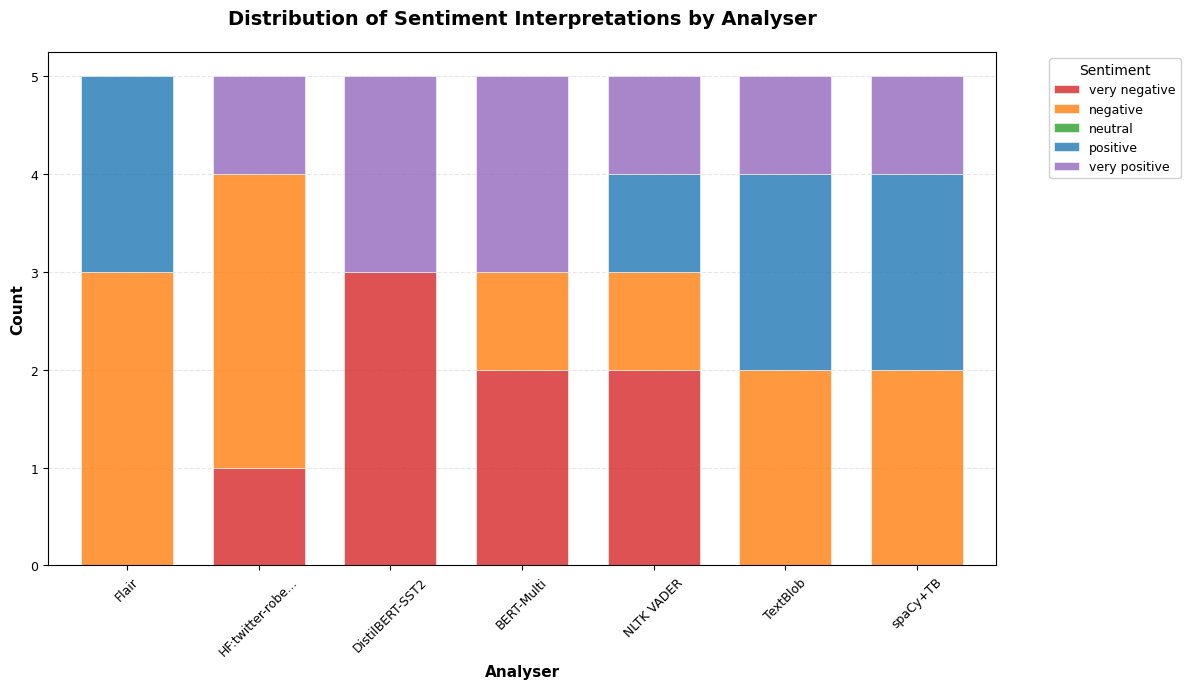

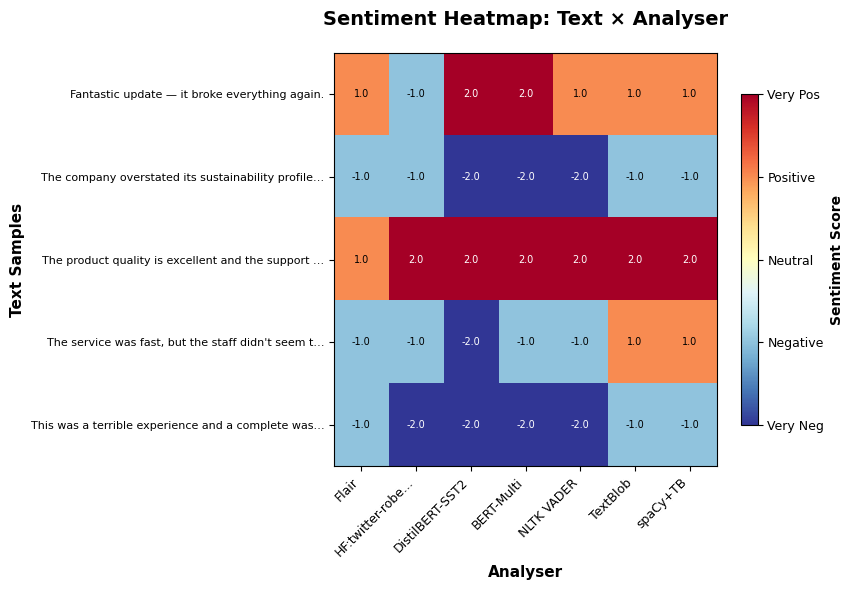

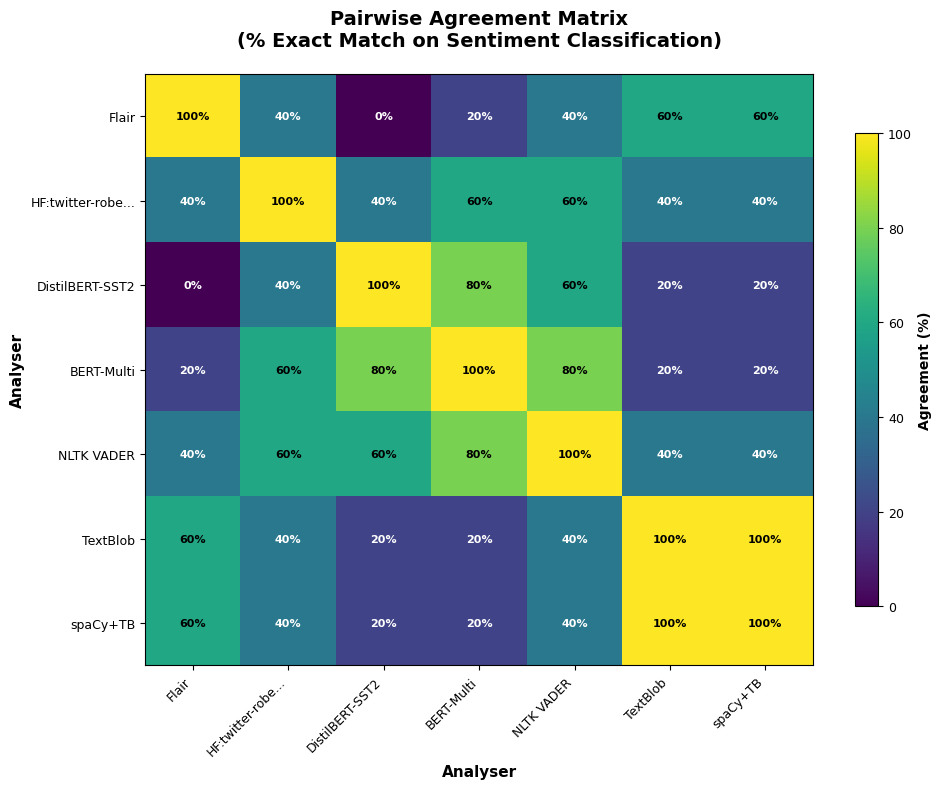

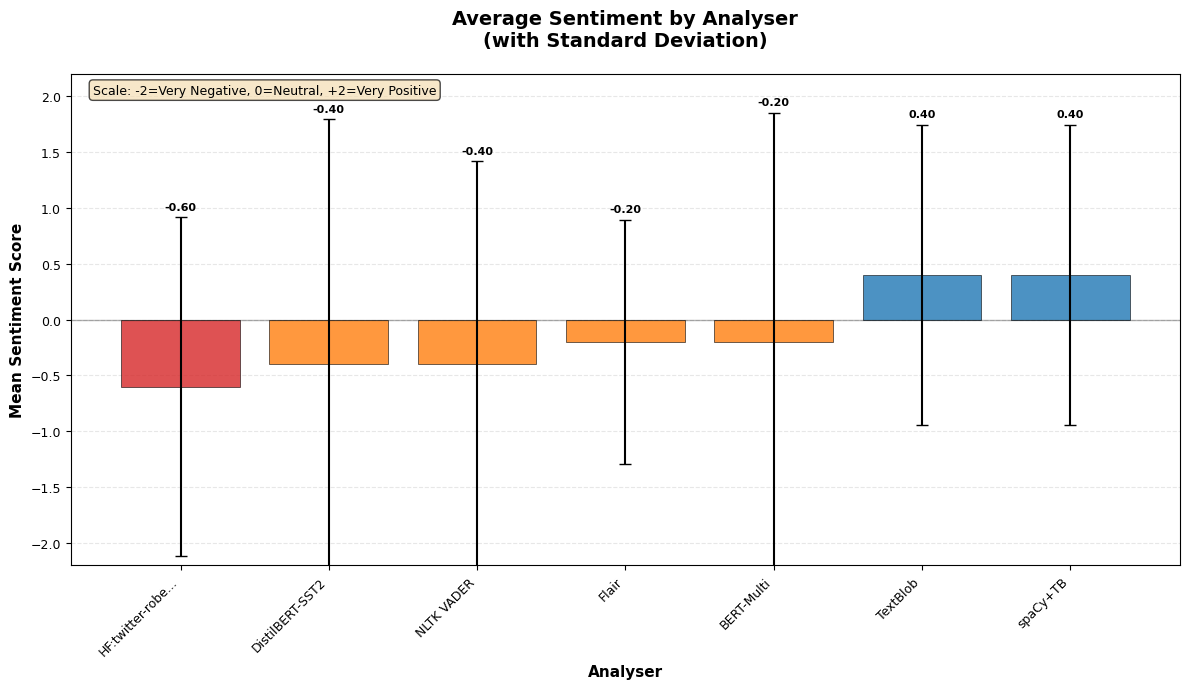

In [22]:
# Visuals (optional; matplotlib only)
plots.plot_distribution(summary5)
plots.plot_heatmap(summary5)
plots.plot_agreement(summary5)
plots.plot_average(summary5)